## Homework 6

This chapter is about decision trees, random forests and XGBoost. 

The goal of this homework is to create a regression model for predicting housing prices (column 'median_house_value'). 

In this homework we'll again use the California Housing Prices dataset - the same one we used in homework 2 and 3.

In [1]:
#import sys
#!{sys.executable} -m pip install xgboost
# previous installations didn't work somehow.  These are installations that I tried which did not work.
# pip install xgboost
# conda install -c conda-forge xgboost

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# download the data 
#!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

In [4]:
# read the data into a Pandas dataframe
df_raw = pd.read_csv("housing.csv")
df_raw.head(n=3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


Use only the following columns:
'latitude', 'longitude', 'housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value',
'ocean_proximity'

Fill NAs with 0.

Apply the log tranform to median_house_value.

Do train/validation/test split with 60%/20%/20% distribution.

Use the train_test_split function and set the random_state parameter to 1.

Use DictVectorizer to turn the dataframe into matrices.

In [5]:
df_raw.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
df = df_raw.fillna(0)
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Apply the log tranform to median_house_value.

In [7]:
df['median_house_value'] = np.log1p(df['median_house_value'])
df.head(n=3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,13.022766,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,12.789687,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,12.771673,NEAR BAY


Do train/validation/test split with 60%/20%/20% distribution. Use the train_test_split function and set the random_state parameter to 1.

In [8]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
df_train.shape, df_val.shape, df_test.shape

((12384, 10), (4128, 10), (4128, 10))

In [9]:
# reset the index for the split sets
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [10]:
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

In [11]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

Use DictVectorizer to turn the dataframe into matrices.

In [12]:
from sklearn.feature_extraction import DictVectorizer

train_dicts = df_train.fillna(0).to_dict(orient='records')

In [13]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

### Question 1

Let's train a decision tree regressor to predict the median_house_value variable.

* Train a model with max_depth=1.

Which feature is used for splitting the data?  
* ocean_proximity=INLAND
* total_rooms
* latitude
* population

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

In [15]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [16]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- ocean_proximity=INLAND <= 0.50
|   |--- value: [12.31]
|--- ocean_proximity=INLAND >  0.50
|   |--- value: [11.61]



/Users/pllee/stackup/stkup_env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [17]:
# Answer to Question 1: feature used for splitting data is ocean_proximity=INLAND

### Question 2

Train a random forest model with these parameters:  
n_estimators=10  
random_state=1  
n_jobs=-1 (optional - to make training faster)  

What's the RMSE of this model on validation?
* 0.05
* 0.25
* 0.55
* 0.85

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [19]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [20]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [21]:
y_pred = rf.predict(X_val)
y_pred

array([12.70112608, 13.08974669, 11.18974702, ..., 12.74865454,
       12.33216648, 12.29711708])

In [22]:
rmse = np.sqrt( mean_squared_error(y_val, y_pred))
rmse

0.24579193759466625

In [23]:
# Answer to Question 2: rmse = 0.25

### Question 3

Now let's experiment with the _n\_estimators_  parameter

Try different values of this parameter from 10 to 200 with step 10.   
Set _random\_state_ to 1.  
Evaluate the model on the validation dataset.  


After which value of n_estimators does RMSE stop improving?
* 10
* 50
* 70
* 150

In [24]:
rmses = []

n_estimators = np.arange(10, 210, step=10)
n_estimators

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])

In [25]:
for n in n_estimators:
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    rmse = np.sqrt( mean_squared_error(y_val, y_pred))
    rmses.append(rmse)

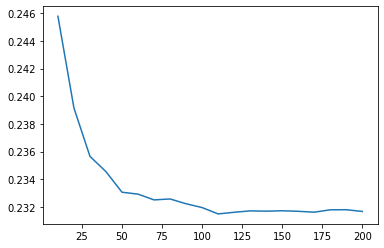

In [26]:
plt.plot(n_estimators, rmses)

In [27]:
# Answer to Question 3: rmse stops improving after n_estimator=150.

### Question 4

Let's select the best _max\_depth_:

Try different values of max_depth: \[10, 15, 20, 25\]   

For each of these values, try different values of _n\_estimators_ from 10 till 200 (with step 10).   

Fix the random seed: _random\_state=1_   

What's the best max_depth:
* 10
* 15
* 20
* 25

In [28]:
max_depths = [10, 15, 20, 25]
n_estimators = np.arange(10, 210, step=10)

scores = []

for d in max_depths:
    for n in n_estimators:
        rf = RandomForestRegressor(n_estimators=n, max_depth=d, random_state=1, n_jobs=-1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        rmse = np.sqrt( mean_squared_error(y_val, y_pred))
        scores.append((d, n, rmse))      

In [29]:
# plot the rmse
columns = ['max_depth', 'n_estimators', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)

In [30]:
colors = ['black', 'blue', 'orange', 'red']


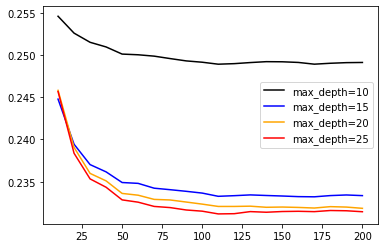

In [31]:
for d, col in zip(max_depths, colors):
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.rmse,
             color=col,
             label='max_depth=%d' % d)

plt.legend()

In [32]:
# Answer to Question 4: Best max depth = 25

### Question 5

We can extract feature importance information from tree-based models.

At each step of the decision tree learning algorithm, it finds the best split.  We can calculate "gain" - the reduction in impurity before and after the split. This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the _feature\_importances_ field.

For this homework question, we'll find the most important feature:

Train the model with these parametes:  
n_estimators=10,  
max_depth=20,  
random_state=1,  
n_jobs=-1 (optional)  

Get the feature importance information from this model.  

What's the most important feature?
* total_rooms
* median_income
* total_bedrooms
* longitude

In [33]:
# train the model
rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [34]:
columns = ["feature", "importance"]
df_feats = pd.DataFrame(zip( dv.get_feature_names(),  rf.feature_importances_ ), columns=columns)

/Users/pllee/stackup/stkup_env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [35]:
df_feats.sort_values(by="importance", ascending=False)

,feature,importance
4,median_income,0.363224
6,ocean_proximity=INLAND,0.310901
2,latitude,0.101333
3,longitude,0.096341
1,housing_median_age,0.033197
10,population,0.030999
12,total_rooms,0.020465
11,total_bedrooms,0.019373
0,households,0.016141
9,ocean_proximity=NEAR OCEAN,0.004452


In [36]:
# Answer to Question 5: most important feature is "median_income"

### Question 6

Now let's train an XGBoost model! For this question, we'll tune the _eta_ parameter:

Install XGBoost  
Create DMatrix for train and validation  
Create a watchlist  
Train a model with the given parameters for 100 rounds

Now change eta from 0.3 to 0.1.

Which eta leads to the best RMSE score on the validation dataset?
* 0.3
* 0.1
* Both give same result

In [37]:
import xgboost as xgb

In [38]:
dv.get_feature_names()[5]

/Users/pllee/stackup/stkup_env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


'ocean_proximity=<1H OCEAN'

In [39]:
# change the feature name to remove the "<" because this gives an error in DMatrix
features = dv.get_feature_names()
features[5] = 'ocean_proximity=1H OCEAN'

dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [40]:
watchlist_03 = [(dtrain, 'train'), (dval, 'val')]
watchlist_01 = [(dtrain, 'train'), (dval, 'val')]

In [41]:
%%capture output

xgb_params_03 = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params_03, dtrain, num_boost_round=100,
                  verbose_eval=1,
                  evals=watchlist_03)

In [42]:
s = output.stdout
print(s[:])

[0]	train-rmse:8.12733	val-rmse:8.13245
[1]	train-rmse:5.69586	val-rmse:5.70070
[2]	train-rmse:3.99540	val-rmse:4.00041
[3]	train-rmse:2.80712	val-rmse:2.81079
[4]	train-rmse:1.97834	val-rmse:1.98175
[5]	train-rmse:1.40218	val-rmse:1.40741
[6]	train-rmse:1.00099	val-rmse:1.00700
[7]	train-rmse:0.72751	val-rmse:0.73439
[8]	train-rmse:0.54190	val-rmse:0.55047
[9]	train-rmse:0.42167	val-rmse:0.43233
[10]	train-rmse:0.34481	val-rmse:0.35782
[11]	train-rmse:0.29835	val-rmse:0.31360
[12]	train-rmse:0.27095	val-rmse:0.28865
[13]	train-rmse:0.25268	val-rmse:0.27334
[14]	train-rmse:0.24295	val-rmse:0.26605
[15]	train-rmse:0.23555	val-rmse:0.26044
[16]	train-rmse:0.22630	val-rmse:0.25229
[17]	train-rmse:0.22233	val-rmse:0.24902
[18]	train-rmse:0.22029	val-rmse:0.24826
[19]	train-rmse:0.21791	val-rmse:0.24696
[20]	train-rmse:0.21580	val-rmse:0.24624
[21]	train-rmse:0.21160	val-rmse:0.24334
[22]	train-rmse:0.20975	val-rmse:0.24245
[23]	train-rmse:0.20904	val-rmse:0.24269
[24]	train-rmse:0.20703	va

In [43]:
output.stdout[:100]

'[0]\ttrain-rmse:8.12733\tval-rmse:8.13245\n[1]\ttrain-rmse:5.69586\tval-rmse:5.70070\n[2]\ttrain-rmse:3.995'

In [44]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_rmse', 'val_rmse']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results


In [45]:
df_results_03 = parse_xgb_output(output)
df_results_03

,num_iter,train_rmse,val_rmse
0,0,8.12733,8.13245
1,1,5.69586,5.70070
2,2,3.99540,4.00041
3,3,2.80712,2.81079
4,4,1.97834,1.98175
...,...,...,...
95,95,0.13553,0.22630
96,96,0.13458,0.22620
97,97,0.13372,0.22608
98,98,0.13344,0.22611


In [46]:
%%capture output

# change eta to 0.1

xgb_params_01 = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params_01, dtrain, num_boost_round=100,
                  verbose_eval=1,
                  evals=watchlist_01)

In [47]:
df_results_01 = parse_xgb_output(output)
df_results_01

,num_iter,train_rmse,val_rmse
0,0,10.44372,10.44938
1,1,9.40118,9.40684
2,2,8.46290,8.46831
3,3,7.61859,7.62391
4,4,6.85878,6.86368
...,...,...,...
95,95,0.18541,0.23106
96,96,0.18470,0.23089
97,97,0.18405,0.23067
98,98,0.18385,0.23057


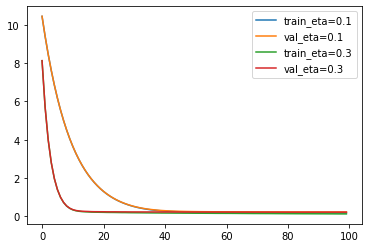

In [48]:
plt.plot(df_results_01.num_iter, df_results_01.train_rmse, label='train_eta=0.1')
plt.plot(df_results_01.num_iter, df_results_01.val_rmse, label='val_eta=0.1')
plt.plot(df_results_03.num_iter, df_results_03.train_rmse, label='train_eta=0.3')
plt.plot(df_results_03.num_iter, df_results_03.val_rmse, label='val_eta=0.3')
plt.legend()

In [49]:
df_results_03.describe()

,num_iter,train_rmse,val_rmse
count,100.000000,100.000000,100.000000
mean,49.500000,0.424271,0.480036
std,29.011492,1.078225,1.065971
min,0.000000,0.132990,0.225790
25%,24.750000,0.150587,0.227670
50%,49.500000,0.169725,0.231150
75%,74.250000,0.204720,0.241355
max,99.000000,8.127330,8.132450


In [50]:
df_results_01.describe()

,num_iter,train_rmse,val_rmse
count,100.000000,100.000000,100.000000
mean,49.500000,1.171136,1.195463
std,29.011492,2.114601,2.105760
min,0.000000,0.183290,0.230540
25%,24.750000,0.197400,0.235190
50%,49.500000,0.227330,0.254275
75%,74.250000,0.819283,0.826368
max,99.000000,10.443720,10.449380


In [52]:
# Answer to Question 6: eta = 0.3 leads to the best RMSE score on the validation dataset
# For eta=0.3, min(val_rmse)= 0.225790 < min(val_rmse)= 0.230540 for eta=0.1, 
# and eta=0.3 converges much faster; its curve is lower than eta=0.1 graph for the most part